In [1]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
ii=[]

In [3]:
# import required module
from pathlib import Path
 
# get the path/directory
folder_dir = '../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
# iterate over files in
# that directory
images = Path(folder_dir).glob('*')
for image in images:
    #print(image)
    ii.append(str(image))

In [4]:
len(ii)

8960

In [5]:
ii[2]

'../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented/0ef974e5-2758-4371-ae64-e28d4b51514f.jpg'

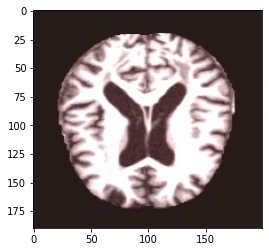

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(ii[1000])
imgplot = plt.imshow(img)
plt.show()

In [9]:
img.shape

(190, 200, 3)

In [10]:
train=ImageDataGenerator(rescale=1./255,validation_split=0.20)
test=ImageDataGenerator(rescale=1./255)

In [12]:
train_data=train.flow_from_directory('../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True,subset="training")
test_data=test.flow_from_directory('../input/augmented-alzheimer-mri-dataset/OriginalDataset',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True)
val_data=train.flow_from_directory('../input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='categorical',
                                        shuffle=True,subset="validation")

Found 27188 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


In [13]:
27188 // 32

849

In [14]:
len(train_data)

850

In [15]:
train_data[0][0][0].shape

(224, 224, 3)

In [16]:
train_data[0][1][0]

array([0., 0., 1., 0.], dtype=float32)

In [17]:
ww=train_data.class_indices
new_list = list(ww.keys())
print(new_list)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


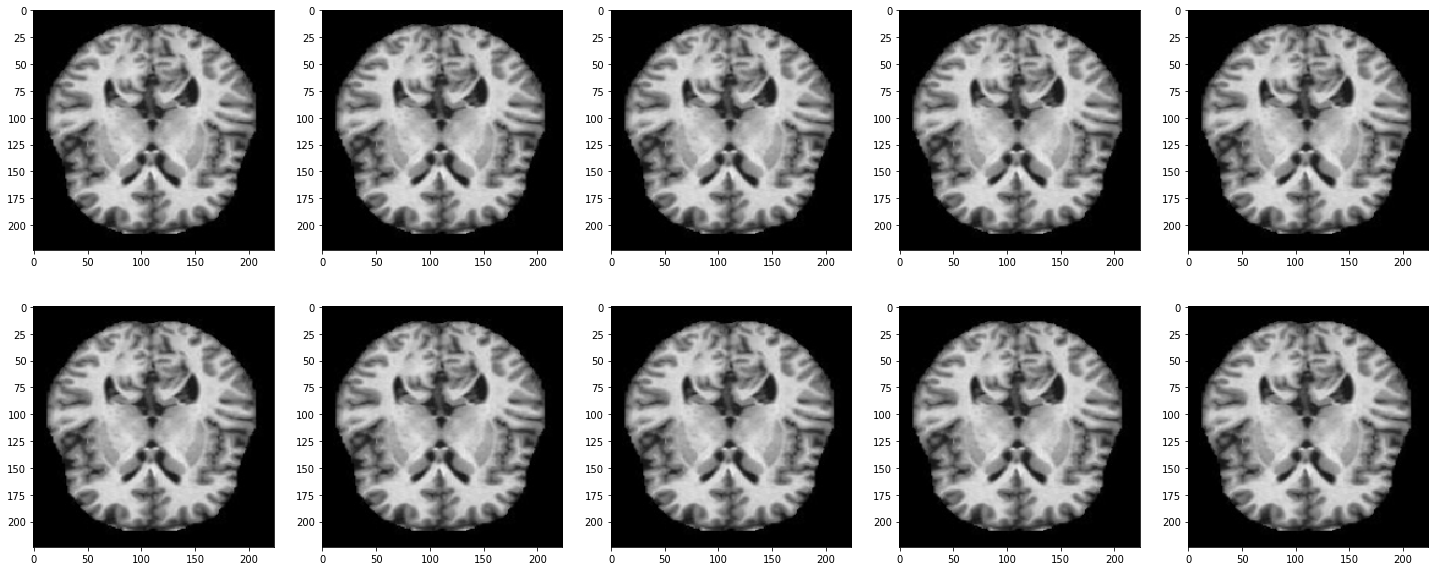

In [18]:
rows = 2
columns = 5
fig = plt.figure(figsize=(25, 10))
for k in range(0,10):
  fig.add_subplot(rows, columns, k+1)
  plt.imshow(train_data[0][0][0])

[456, 705, 578, 182, 346, 112, 470, 589, 249, 606]


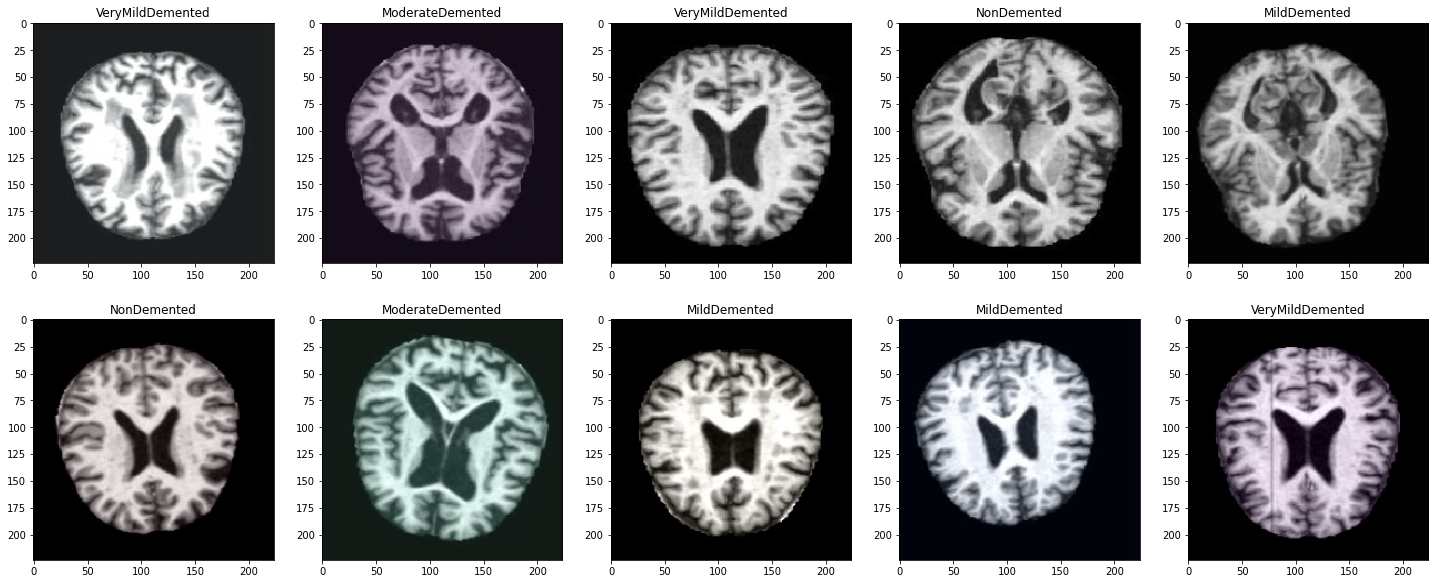

In [19]:
import random
fig = plt.figure(figsize=(25, 10))
randomlist = random.sample(range(0, 850), 10)
rows = 2
columns = 5
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(train_data[i][1][30] == 1)
  rrr=rr[0][0]

  plt.title(new_list[rrr])
  plt.imshow(train_data[i][0][30])
  #print(i)
  #batch size 30
print(randomlist)

array([0., 1., 0., 0.], dtype=float32)

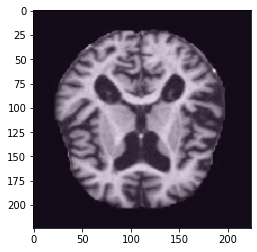

In [20]:
plt.imshow(train_data[705][0][30])
train_data[705][1][30]

# Model

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import tensorflow as tf

In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
#model = VGG16(weights='imagenet')

2022-10-03 03:25:32.288550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 03:25:32.403388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 03:25:32.404556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 03:25:32.406652: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [23]:
for layer in model.layers:
    layer.trainable = False

In [24]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten



x = Flatten()(model.output)
x=Dense(256,activation='relu')(x)
prediction=Dense(4, activation='softmax')(x)
model = Model(inputs=model.input, outputs=prediction)

In [25]:
model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [28]:
# fit the model
history = model.fit(
 train_data,
  
  validation_data=val_data,
  epochs=10,
  callbacks=[early_stop,checkpoint],shuffle=True)

2022-10-03 03:26:20.560060: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-03 03:26:22.349562: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


850/850 [==============================] - 277s 315ms/step - loss: 0.6651 - accuracy: 0.7327 - val_loss: 0.3864 - val_accuracy: 0.8458
Epoch 2/10
850/850 [==============================] - 88s 103ms/step - loss: 0.3510 - accuracy: 0.8585 - val_loss: 0.3086 - val_accuracy: 0.8780
Epoch 3/10
850/850 [==============================] - 83s 97ms/step - loss: 0.2765 - accuracy: 0.8902 - val_loss: 0.2385 - val_accuracy: 0.9055
Epoch 4/10
850/850 [==============================] - 89s 105ms/step - loss: 0.2059 - accuracy: 0.9182 - val_loss: 0.2170 - val_accuracy: 0.9188
Epoch 5/10
850/850 [==============================] - 86s 101ms/step - loss: 0.1743 - accuracy: 0.9322 - val_loss: 0.1804 - val_accuracy: 0.9320
Epoch 6/10
850/850 [==============================] - 91s 107ms/step - loss: 0.1491 - accuracy: 0.9427 - val_loss: 0.2633 - val_accuracy: 0.8961
Epoch 7/10
850/850 [==============================] - 86s 102ms/step - loss: 0.1417 - accuracy: 0.9472 - val_loss: 0.1557 - val_accuracy: 0.9

In [29]:
_, accuracy = history.model.evaluate(test_data)
print("Model accuracy: %.2f"% (accuracy*100))

200/200 [==============================] - 62s 309ms/step - loss: 0.1064 - accuracy: 0.9572
Model accuracy: 95.72


In [30]:
history.model.evaluate(test_data)

200/200 [==============================] - 14s 69ms/step - loss: 0.1064 - accuracy: 0.9572


[0.10638018697500229, 0.9571874737739563]

In [31]:
vgg_preds = model.predict(test_data)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [32]:
true_classes=test_data.classes

In [33]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 38.62%


In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [35]:
confusion_matrix(test_data.classes,vgg_pred_classes)

array([[ 122,   13,  423,  338],
       [  10,    0,   24,   30],
       [ 410,   27, 1505, 1258],
       [ 305,   24, 1066,  845]])

In [36]:
print(classification_report(test_data.classes,vgg_pred_classes))

              precision    recall  f1-score   support

           0       0.14      0.14      0.14       896
           1       0.00      0.00      0.00        64
           2       0.50      0.47      0.48      3200
           3       0.34      0.38      0.36      2240

    accuracy                           0.39      6400
   macro avg       0.25      0.25      0.25      6400
weighted avg       0.39      0.39      0.39      6400



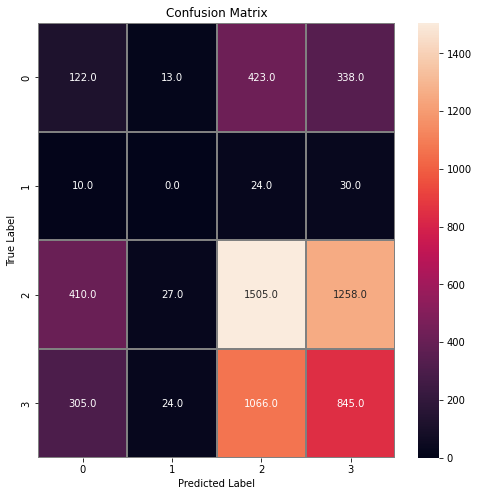

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(test_data.classes,vgg_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [39]:
new_list

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [40]:
len(test_data)

200

## Prediction in the test data

[92, 181, 139, 24, 162, 122, 11, 34, 16, 51, 61, 171, 189, 99, 137]


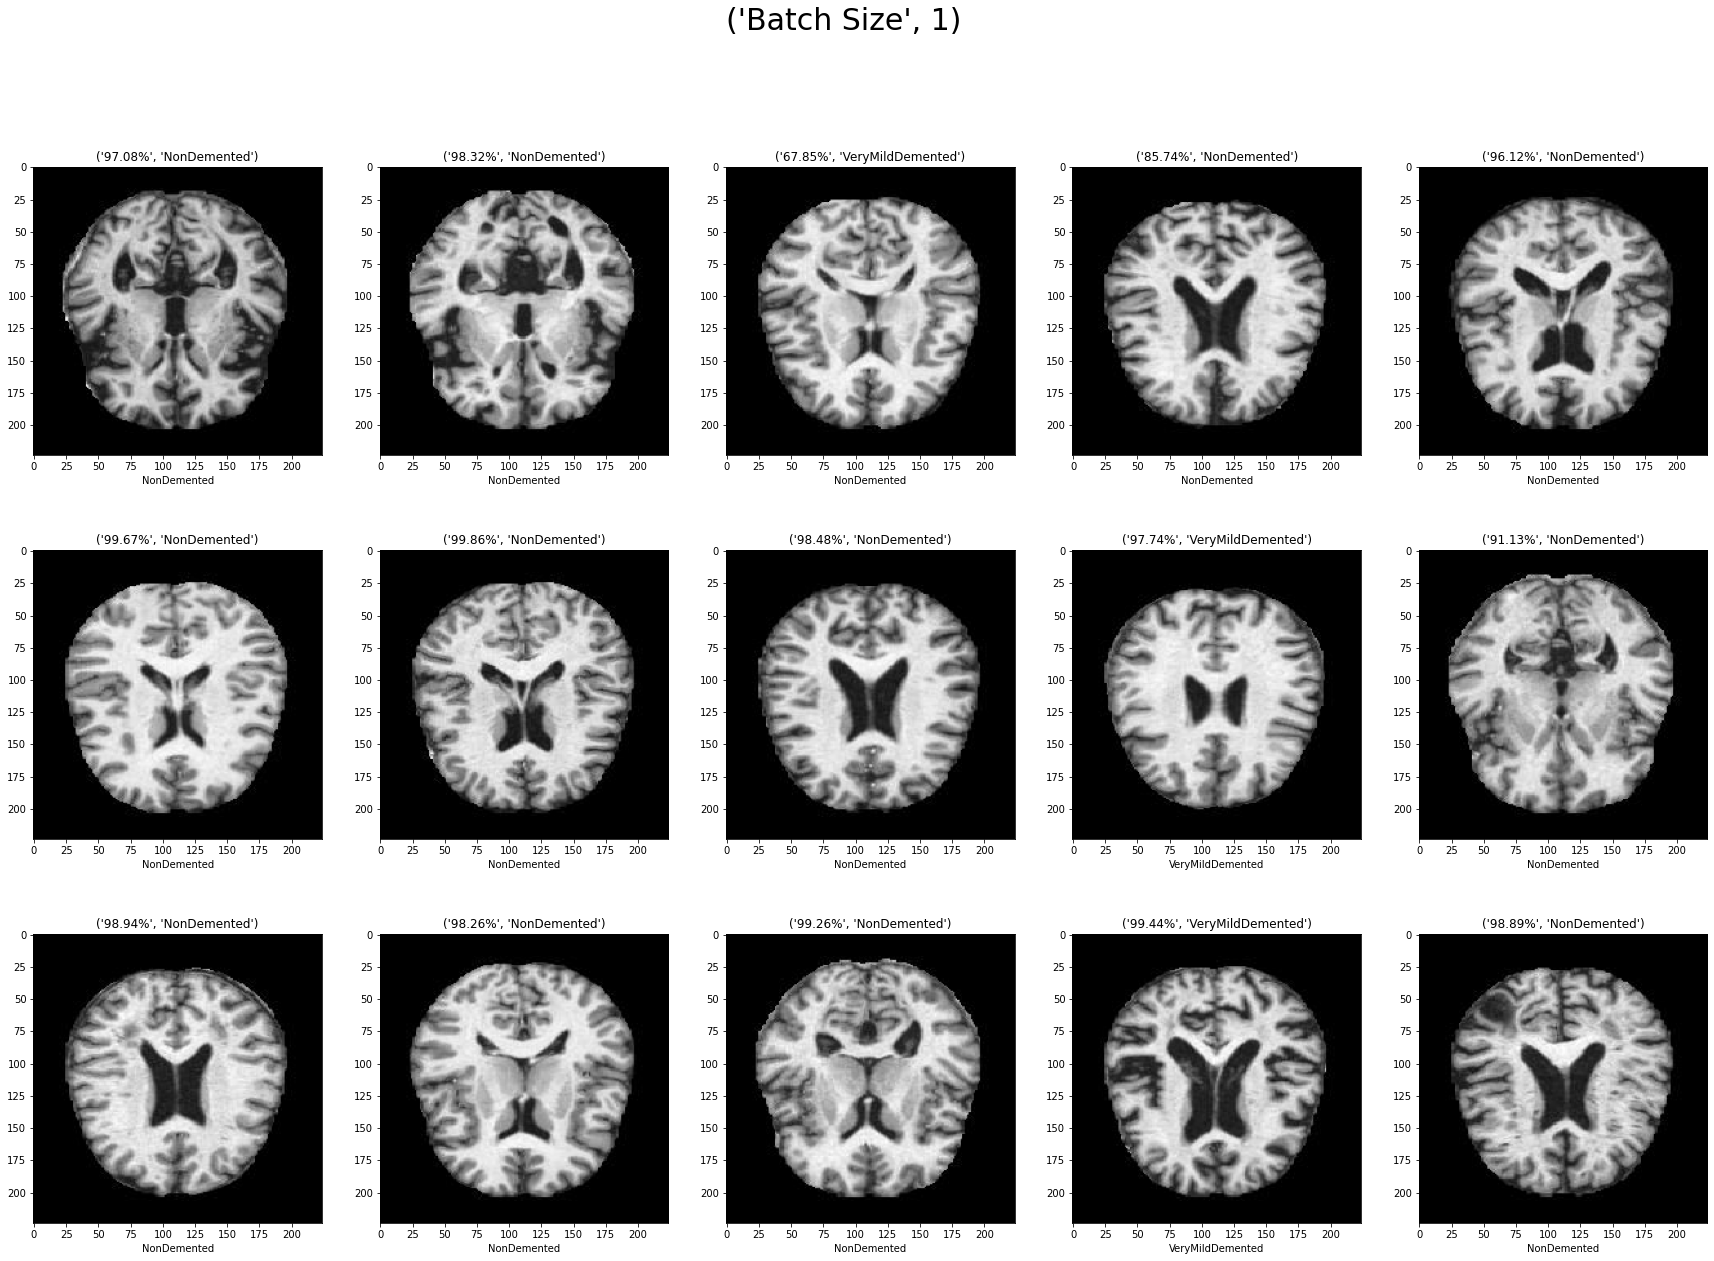

In [42]:
#batch 1
import random
fig = plt.figure(figsize=(30, 20))
randomlist = random.sample(range(0, len(test_data)), 15)
rows = 3
columns = 5
bs=1 
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][bs] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][bs]
  bb=test_data[i][0][bs]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  fig.suptitle(("Batch Size",bs),fontsize=30)
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][bs])
print(randomlist)


[147, 186, 100, 33, 25, 109, 0, 35, 40, 63, 56, 31, 98, 73, 60]


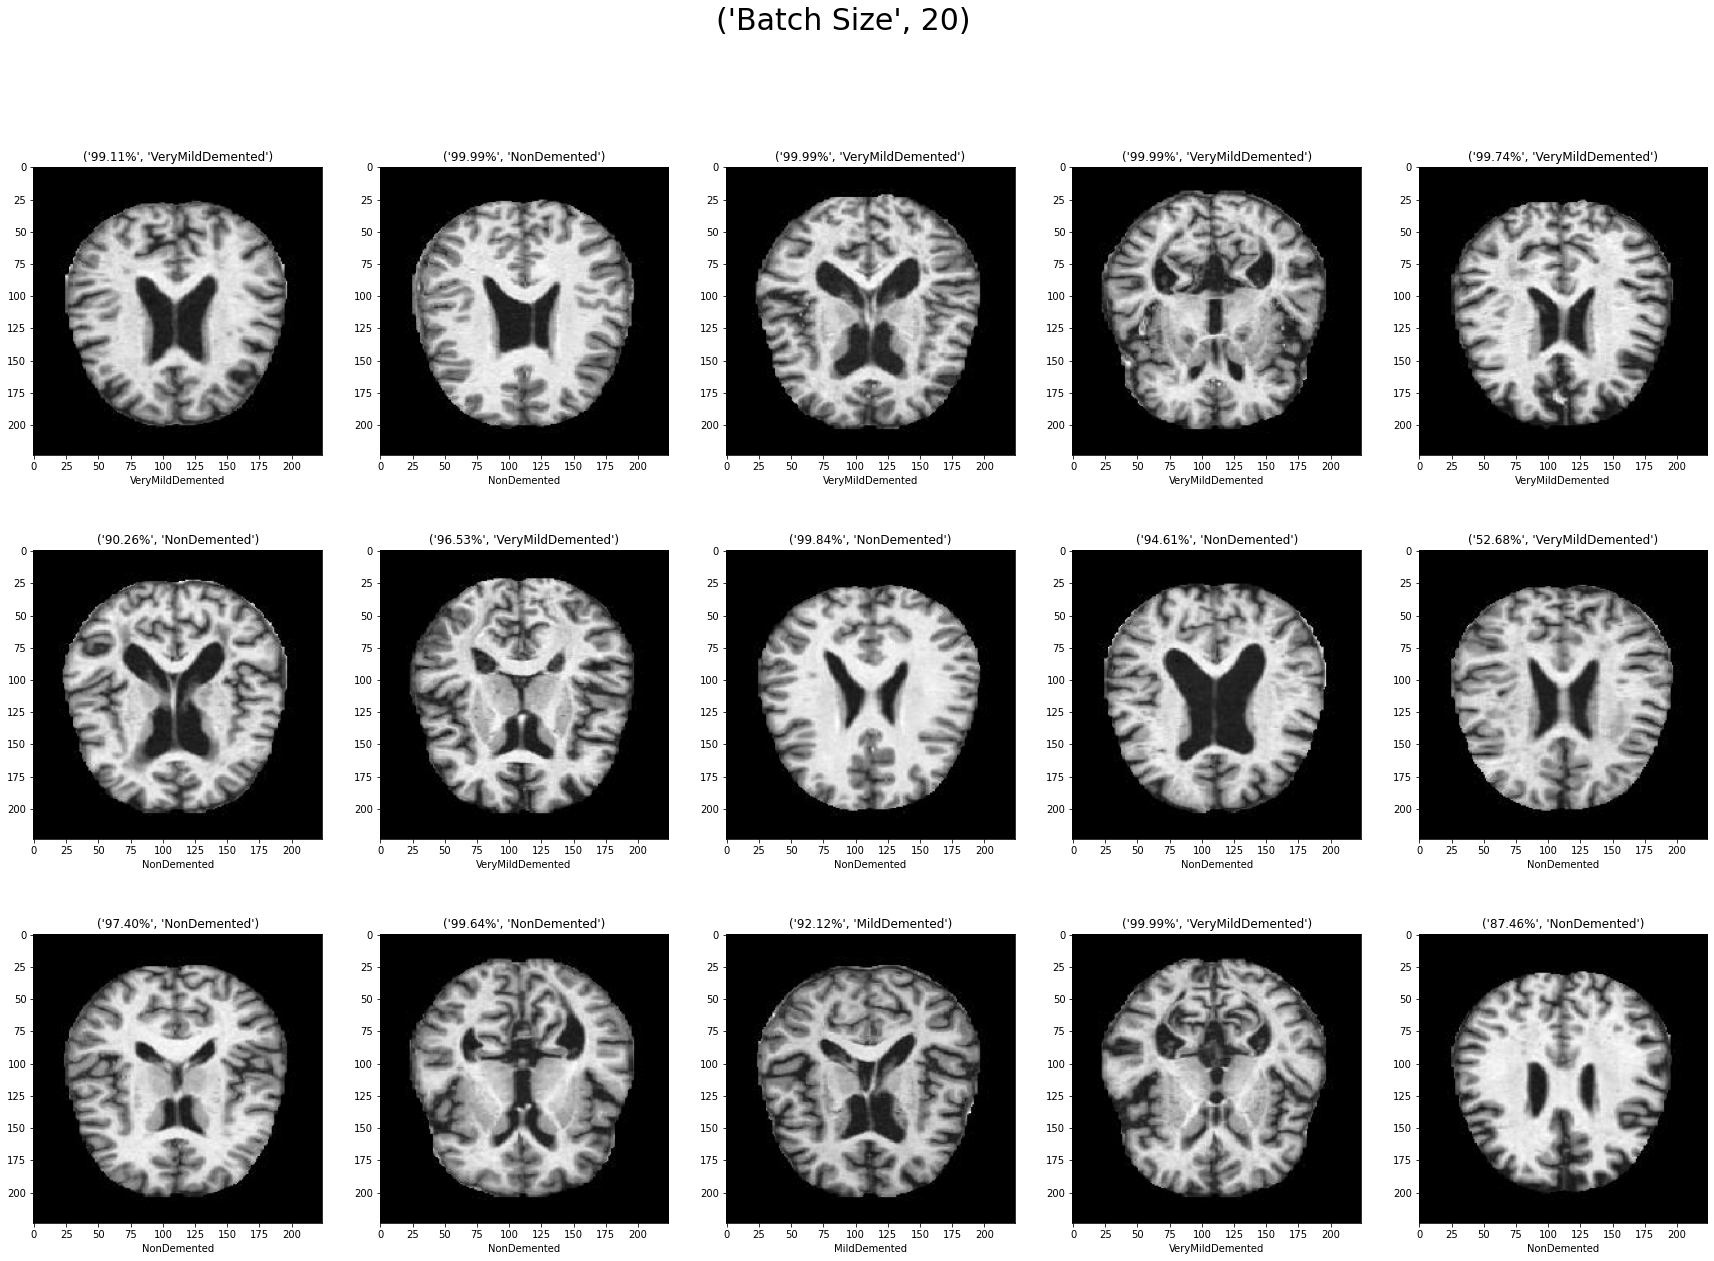

In [43]:
#batch 1
import random
fig = plt.figure(figsize=(30, 20))
randomlist = random.sample(range(0, len(test_data)), 15)
rows = 3
columns = 5
bs=20 
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][bs] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][bs]
  bb=test_data[i][0][bs]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  fig.suptitle(("Batch Size",bs),fontsize=30)
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][bs])
print(randomlist)


[147, 14, 96, 15, 162, 93, 97, 6, 143, 118, 98, 86, 82, 163, 103]


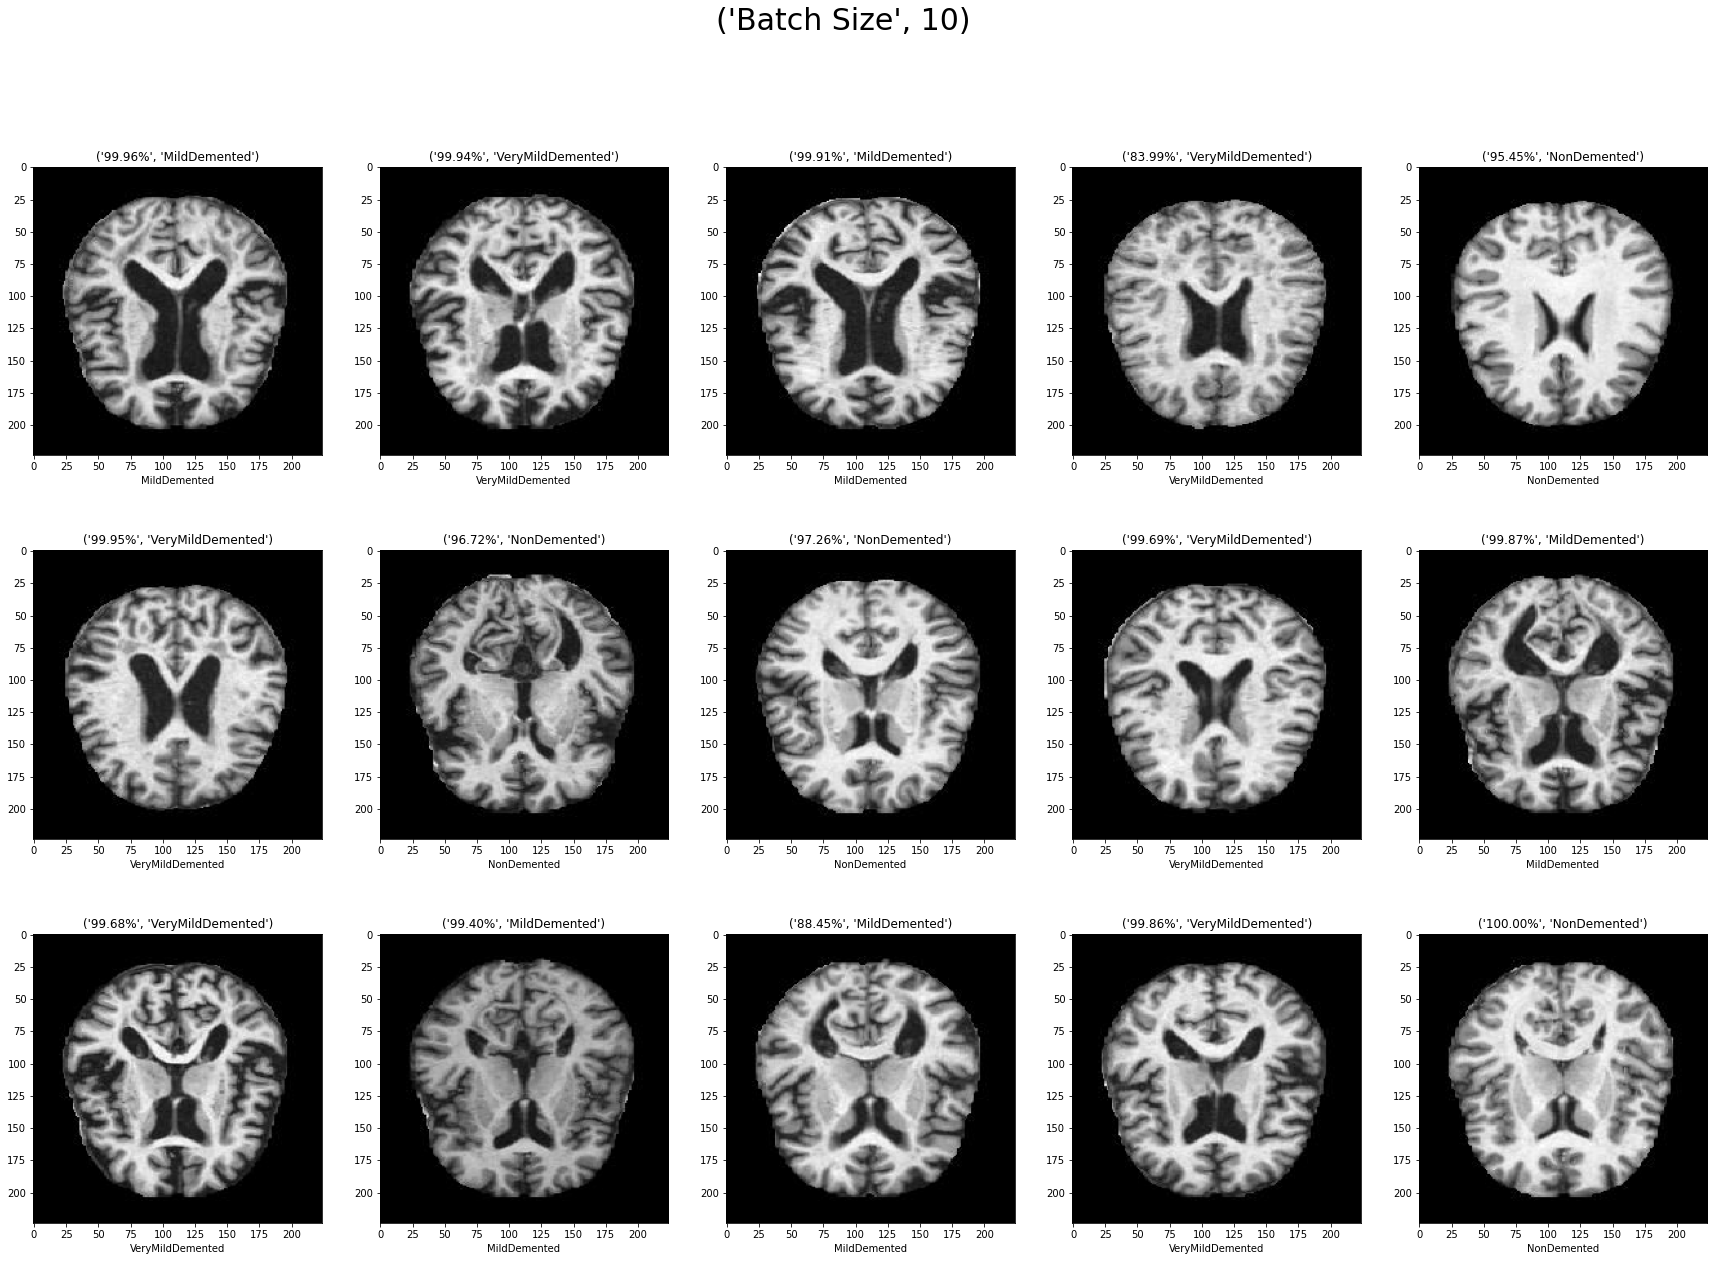

In [44]:
#batch 1
import random
fig = plt.figure(figsize=(30, 20))
randomlist = random.sample(range(0, len(test_data)), 15)
rows = 3
columns = 5
bs=10
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][bs] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][bs]
  bb=test_data[i][0][bs]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  fig.suptitle(("Batch Size",bs),fontsize=30)
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][bs])
print(randomlist)


[184, 52, 177, 26, 197, 7, 114, 158, 119, 186, 19, 123, 170, 34, 44, 67, 180, 166, 97, 136, 48, 128, 23, 106, 71]


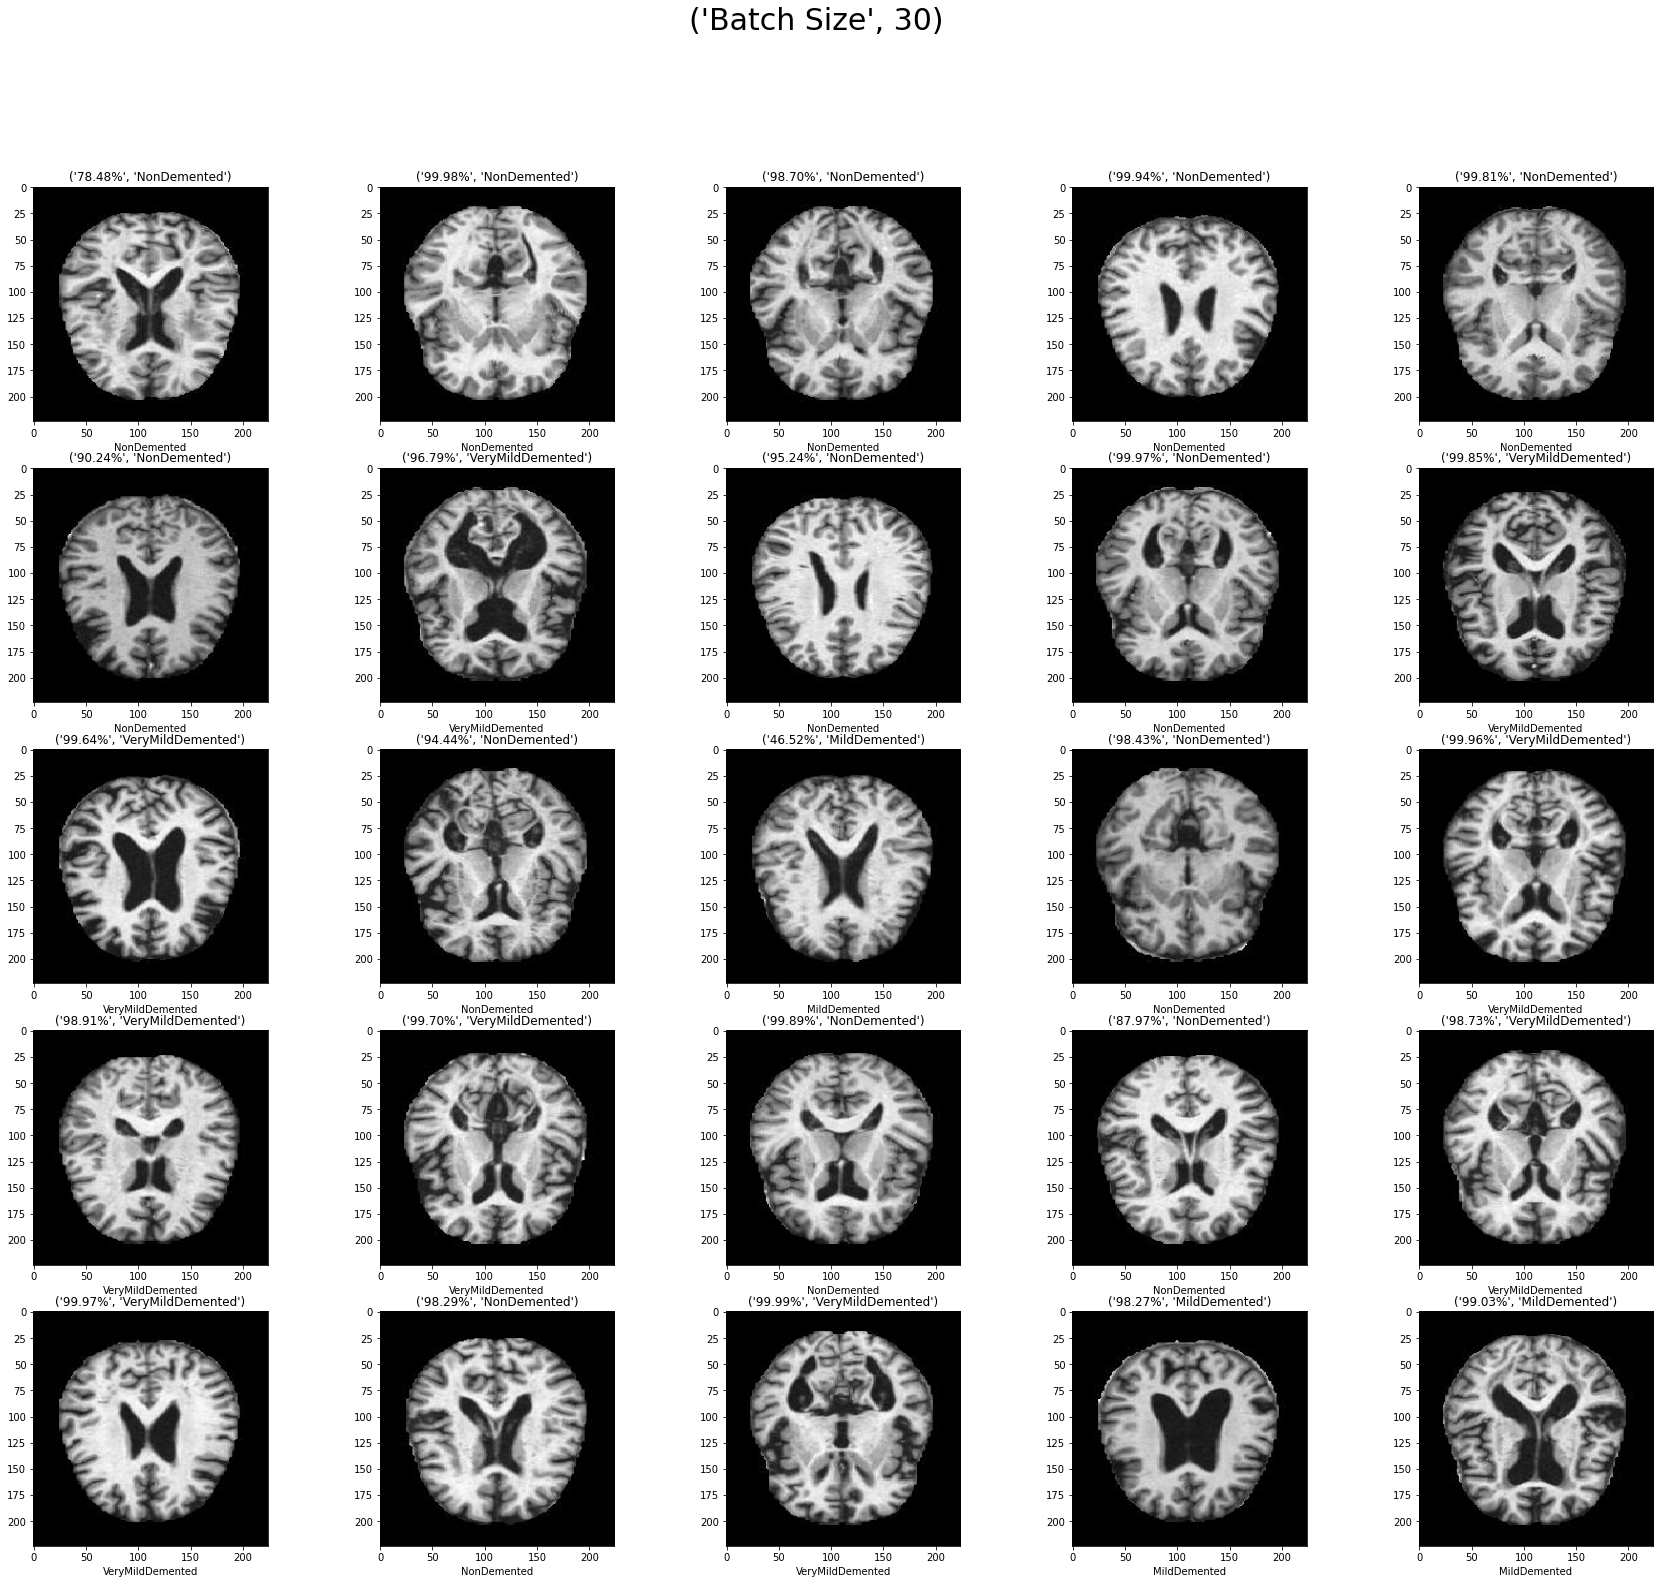

In [63]:
#batch 1
import random
fig = plt.figure(figsize=(30, 25))
randomlist = random.sample(range(0, len(test_data)), 25)
rows = 5
columns = 5
bs=30
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][bs] == 1)
  rrr=rr[0][0]

  aa=test_data[i][1][bs]
  bb=test_data[i][0][bs]
  bb=np.expand_dims(bb,axis=0)
  z=model.predict(bb)
  zz=np.argmax(z, axis=1)
  fig.suptitle(("Batch Size",bs),fontsize=30)
  if zz[0]==0:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==1:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  elif zz[0]==2:
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  else :
    zz=zz[0]
    new1="{:.2f}%".format(z[0][zz]*100),new_list[zz]
    plt.title(new1)
    plt.xlabel(new_list[rrr])
  plt.imshow(test_data[i][0][bs])
print(randomlist)


## plotting the test data

[199, 66, 17, 114, 188, 62, 105, 134, 153, 145, 123, 173, 6, 29, 146, 136, 90, 141, 88, 190]


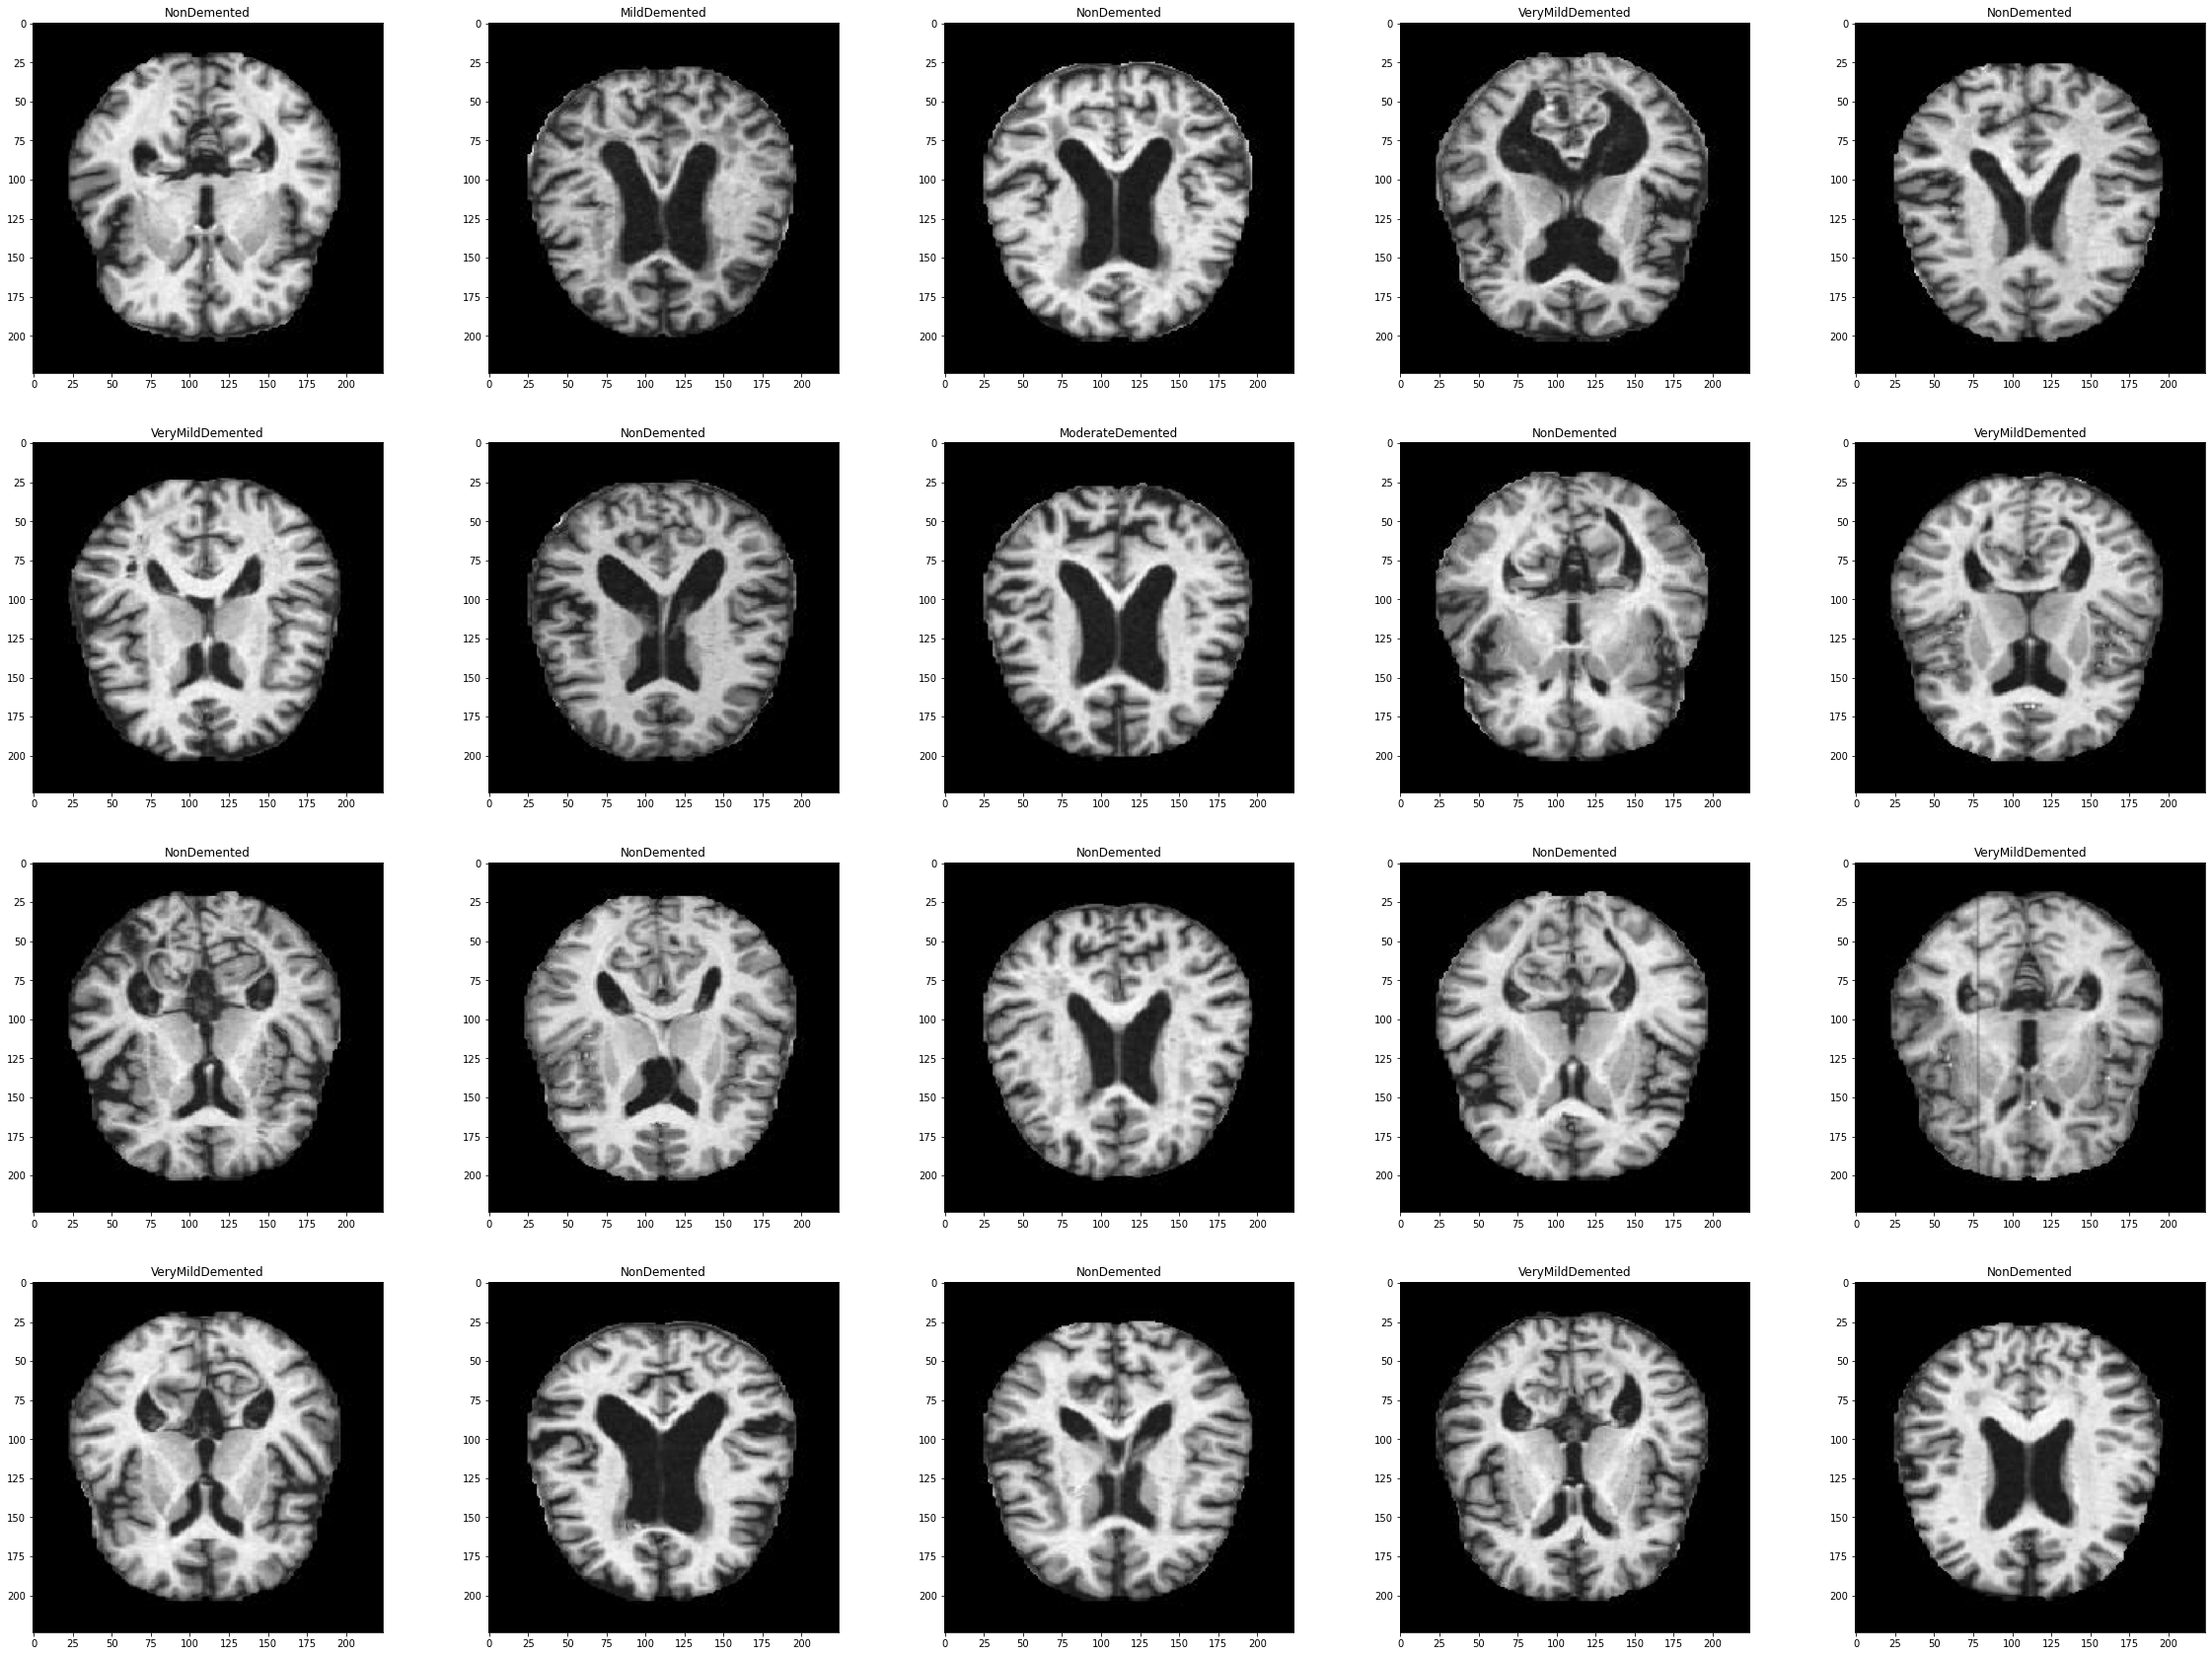

In [48]:
import random
fig = plt.figure(figsize=(40, 30))
randomlist = random.sample(range(0, len(test_data)), 20)
rows = 4
columns = 5
for i in randomlist:
  fig.add_subplot(rows, columns, randomlist.index(i)+1)
  rr=np.where(test_data[i][1][30] == 1)
  rrr=rr[0][0]

  plt.title(new_list[rrr])
  plt.imshow(test_data[i][0][30])
  #print(i)
  #batch size 30
print(randomlist)

array([0., 1., 0., 0.], dtype=float32)

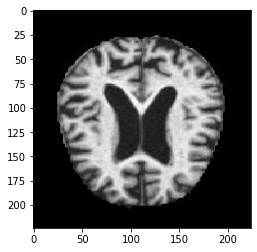

In [49]:
plt.imshow(test_data[134][0][30])
test_data[134][1][30]

## Predicting from out

In [51]:
aa=test_data[134][0][30]

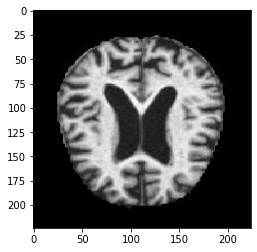

In [52]:
plt.imshow(aa)

In [53]:
aa.shape

(224, 224, 3)

In [54]:
bb=np.expand_dims(aa,axis=0)

In [55]:
bb.shape

(1, 224, 224, 3)

In [56]:
z=model.predict(bb)

In [57]:
z[0]

array([3.2366747e-09, 1.0000000e+00, 8.3802167e-11, 8.1951259e-13],
      dtype=float32)

In [58]:
zz=np.argmax(z, axis=1)

In [60]:
zz[0]

1

In [61]:
new_list[zz[0]]

'ModerateDemented'